In [229]:
import urllib.parse as urlparse
import pandas as pd
import requests as rq
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [230]:
__API_KEY__ = ""#Enter your API key here
departure_point = 'Los Angeles'
delivery_point = 'Irvine'
departure_time = '2022-02-10T08:00:00'

In [231]:
def search_city_coords(city, key):
    coordinates_base_url = "https://api.tomtom.com/search/2/search/"+urlparse.quote(city)+".json?minFuzzyLevel=1&maxFuzzyLevel=2&view=Unified&relatedPois=off&key="+key
    json_response = rq.get(coordinates_base_url).json()
    latitude = json_response['results'][0]['position']['lat']
    longitude = json_response['results'][0]['position']['lon']
    position = str(latitude)+","+str(longitude)
    return position

In [232]:
def get_routes_info(start, stop, departAt, key):
    base_url = "https://api.tomtom.com/routing/1/calculateRoute/"+start+":"+stop+"/json?maxAlternatives=5&instructionsType=text&departAt="+departAt+"&key="+key
    json_response = rq.get(base_url).json()
    routes_obj = json_response['routes']
    obj_length = len(routes_obj)
    for i in range(obj_length):
        if (i == 0):
            summary_df = pd.DataFrame([routes_obj[0]['summary']])
        else:
            summary_df = summary_df.append((routes_obj[i]['summary']),ignore_index=True)
    return summary_df

In [233]:
departure_point_coords = search_city_coords(departure_point, __API_KEY__)
delivery_point_coords = search_city_coords(delivery_point, __API_KEY__)

summary_df = get_routes_info(departure_point_coords, delivery_point_coords, departure_time, __API_KEY__)

In [234]:
summary_df.iloc[: , :6]

,lengthInMeters,travelTimeInSeconds,trafficDelayInSeconds,trafficLengthInMeters,departureTime,arrivalTime
0,64207,3297,0,0,2022-02-10T08:00:00-08:00,2022-02-10T08:54:56-08:00
1,75963,3574,0,0,2022-02-10T08:00:00-08:00,2022-02-10T08:59:34-08:00
2,73976,3679,0,0,2022-02-10T08:00:00-08:00,2022-02-10T09:01:19-08:00
3,84176,3883,0,0,2022-02-10T08:00:00-08:00,2022-02-10T09:04:43-08:00
4,68675,3677,0,0,2022-02-10T08:00:00-08:00,2022-02-10T09:01:17-08:00
5,86604,3909,0,0,2022-02-10T08:00:00-08:00,2022-02-10T09:05:08-08:00


Text(0, 0.5, 'Travel time (in seconds)')

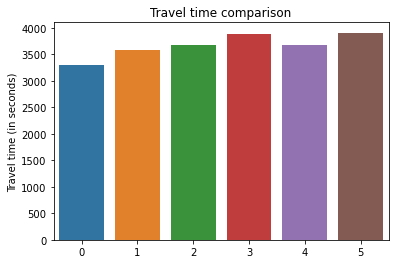

In [235]:
plt.figure(figsize=(6,4))
plt.title("Travel time comparison")
sns.barplot(x=summary_df.index, y=summary_df.iloc[: , :6]['travelTimeInSeconds'])
plt.ylabel("Travel time (in seconds)")

In [236]:
min_travel_time = summary_df['travelTimeInSeconds'].min()
print("Minimum travel time is: ",min_travel_time," seconds")

Minimum travel time is:  3297  seconds


In [237]:
min_pos = summary_df['travelTimeInSeconds'].idxmin()
min_pos

0

In [238]:
def get_guidance(start, stop, departAt, position, key):
    guide = ''
    base_url = "https://api.tomtom.com/routing/1/calculateRoute/"+start+":"+stop+"/json?maxAlternatives=5&instructionsType=text&departAt="+departAt+"&key="+key
    json_response = rq.get(base_url).json()
    guidance_obj = json_response['routes'][position]['guidance']['instructionGroups']
    obj_length = len(guidance_obj)
    for i in range(obj_length):
        if i==0:
            guide = guidance_obj[0]['groupMessage']
        else:
            guide = guide+". "+ guidance_obj[i]['groupMessage']
    return guide

In [239]:
shortest_route = get_guidance(departure_point_coords, delivery_point_coords, departure_time,min_pos, __API_KEY__)
print("HELLO THERE, FOLLOW THIS ROUTE FOR A FASTER DELIVERY: ", shortest_route,"\n\nThank you, and have a safe ride.")

HELLO THERE, FOLLOW THIS ROUTE FOR A FASTER DELIVERY:  Leave from N Main St. Take the United States Highway 101 S/US-101 S. Take the Interstate Highway 5 S/I-5 S toward Santa Ana. Take the Jamboree Rd, Jamboree Rd S, Barranca Pkwy. Continue to your destination at Harvard Ave 

Thank you, and have a safe ride.


In [240]:
time_list = ['2022-02-10T09:00:00', '2022-02-10T05:00:00', '2022-02-10T07:00:00', '2022-02-10T11:00:00', '2022-02-10T08:00:00']
agg_df = pd.DataFrame()
# Using for loop
for time in time_list:
    summary_df2 = get_routes_info(departure_point_coords, delivery_point_coords, time, __API_KEY__)
    agg_df = agg_df.append(summary_df2,ignore_index=True)

agg_df.iloc[: , :6]

,lengthInMeters,travelTimeInSeconds,trafficDelayInSeconds,trafficLengthInMeters,departureTime,arrivalTime
0,64207,2932,0,0,2022-02-10T09:00:00-08:00,2022-02-10T09:48:51-08:00
1,73348,3205,0,0,2022-02-10T09:00:00-08:00,2022-02-10T09:53:25-08:00
2,75965,3164,0,0,2022-02-10T09:00:00-08:00,2022-02-10T09:52:44-08:00
3,75236,3342,0,0,2022-02-10T09:00:00-08:00,2022-02-10T09:55:41-08:00
4,84176,3455,0,0,2022-02-10T09:00:00-08:00,2022-02-10T09:57:35-08:00
5,75814,3487,0,0,2022-02-10T09:00:00-08:00,2022-02-10T09:58:07-08:00
6,64190,2328,0,0,2022-02-10T05:00:00-08:00,2022-02-10T05:38:47-08:00
7,69303,2500,0,0,2022-02-10T05:00:00-08:00,2022-02-10T05:41:40-08:00
8,73289,2584,0,0,2022-02-10T05:00:00-08:00,2022-02-10T05:43:04-08:00
9,74091,2661,0,0,2022-02-10T05:00:00-08:00,2022-02-10T05:44:20-08:00


<AxesSubplot:title={'center':'Distance and time travel comparison'}>

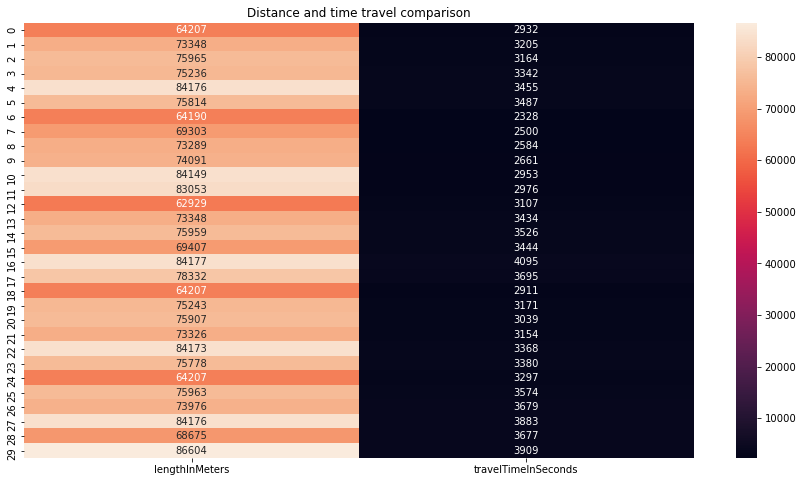

In [241]:
plt.figure(figsize=(15,8))

plt.title("Distance and time travel comparison")

sns.heatmap(data=agg_df.iloc[: , :2], fmt='d', annot=True)

In [242]:
min_travel_time = agg_df['travelTimeInSeconds'].min()
print("Minimum travel time is: ",min_travel_time," seconds")

Minimum travel time is:  2328  seconds


In [243]:
min_pos = summary_df['travelTimeInSeconds'].idxmin()

shortest_route = get_guidance(departure_point_coords, delivery_point_coords, departure_time,min_pos, __API_KEY__)
print("HELLO THERE, FOLLOW THIS ROUTE FOR A FASTER DELIVERY: ", shortest_route,"\n\nThank you, and have a safe ride.")

HELLO THERE, FOLLOW THIS ROUTE FOR A FASTER DELIVERY:  Leave from N Main St. Take the United States Highway 101 S/US-101 S. Take the Interstate Highway 5 S/I-5 S toward Santa Ana. Take the Jamboree Rd, Jamboree Rd S, Barranca Pkwy. Continue to your destination at Harvard Ave 

Thank you, and have a safe ride.
